<a href="https://colab.research.google.com/github/nhaandq/AI_project-VNMoney/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import pickle
from os import listdir
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.preprocessing.image import  img_to_array
from google.colab.patches import cv2_imshow
#from tensorflow.keras.optimizers import SGD

In [252]:
raw_folder = '/content/drive/MyDrive/Money/Training_data/'

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
X = []
y = []
classes = ['200','500','1000','2000','5000','10000','20000','50000','100000','200000','500000']

In [270]:
i=0

for folder in classes:
  print("Folder=",folder)
  for file in listdir(raw_folder + folder):
    print("File=", file)
    X.append(cv.resize(cv.imread(raw_folder+ folder +"/" +file, cv.IMREAD_COLOR),dsize=(128,128)))
    y.append(i)
  i+=1

Folder= 200
File= 3.png
File= 1.png
File= 2.png
File= 0.png
File= 8.png
File= 4.png
File= 6.png
File= 9.png
File= 5.png
File= 10.png
File= 7.png
File= 15.png
File= 11.png
File= 13.png
File= 17.png
File= 14.png
File= 12.png
File= 16.png
File= 20.png
File= 18.png
File= 19.png
File= 22.png
File= 21.png
File= 23.png
File= 27.png
File= 24.png
File= 29.png
File= 25.png
File= 28.png
File= 26.png
File= 30.png
File= 37.png
File= 34.png
File= 35.png
File= 31.png
File= 33.png
File= 32.png
File= 36.png
File= 42.png
File= 41.png
File= 38.png
File= 39.png
File= 43.png
File= 40.png
File= 50.png
File= 47.png
File= 48.png
File= 45.png
File= 49.png
File= 44.png
File= 46.png
File= 54.png
File= 52.png
File= 56.png
File= 51.png
File= 53.png
File= 55.png
File= 59.png
File= 60.png
File= 61.png
File= 57.png
File= 63.png
File= 58.png
File= 62.png
File= 64.png
File= 68.png
File= 69.png
File= 70.png
File= 65.png
File= 67.png
File= 66.png
File= 74.png
File= 76.png
File= 72.png
File= 71.png
File= 73.png
File= 75.p

In [271]:
X = np.array(X)
y = np.array(y)
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Tạo tệp TrainTest trong GDrive, sau đó lưu dữ liệu X,y và0
file = open('/content/drive/MyDrive/Money/TrainTest', 'wb')
pickle.dump((X,y), file)
file.close()

In [272]:
# Load X, y từ file TrainTest
file = open('/content/drive/MyDrive/Money/TrainTest', 'rb')
(X, y) = pickle.load(file)
file.close()

print(X.shape)
print(y.shape)
print(classes)

(1157, 128, 128, 3)
(1157, 11)
['200', '500', '1000', '2000', '5000', '10000', '20000', '50000', '100000', '200000', '500000']


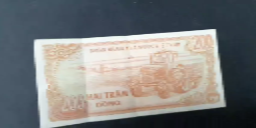

[1 0 0 0 0 0 0 0 0 0 0]
200


In [276]:
cv2_imshow(cv.resize(X[100],dsize=(256,128)))
print(y[1])
print(classes[np.argmax(y[1])])

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(925, 128, 128, 3)
(925, 11)
(232, 128, 128, 3)
(232, 11)


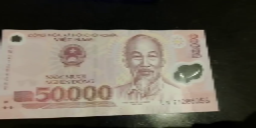

[1 0 0 0 0 0 0 0 0 0 0]
50000


In [278]:
cv2_imshow(cv.resize(X_train[1],dsize=(256,128)))
print(y[1])
print(classes[np.argmax(y_train[1])])

In [279]:
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')

In [280]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128,128,3) ) )
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11,activation='softmax'))

In [281]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
  rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,
	horizontal_flip=True, brightness_range=[0.2,1.5], fill_mode="nearest")

In [282]:
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [283]:
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(aug.flow(X_train1, y_train, batch_size=64), epochs=100, 
                          validation_data=aug.flow(X_test1,y_test,batch_size=len(X_test1)),
                          callbacks=callbacks_list,verbose = 1)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 3.4728 - accuracy: 0.1135
Epoch 1: val_accuracy improved from -inf to 0.11207, saving model to weights-01-0.11.hdf5
15/15 [==============================] - 7s 462ms/step - loss: 3.4728 - accuracy: 0.1135 - val_loss: 2.3872 - val_accuracy: 0.1121
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 2.3794 - accuracy: 0.1081
Epoch 2: val_accuracy improved from 0.11207 to 0.12500, saving model to weights-02-0.12.hdf5
15/15 [==============================] - 6s 372ms/step - loss: 2.3794 - accuracy: 0.1081 - val_loss: 2.3645 - val_accuracy: 0.1250
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 2.3339 - accuracy: 0.1470
Epoch 3: val_accuracy did not improve from 0.12500
15/15 [==============================] - 5s 360ms/step - loss: 2.3339 - accuracy: 0.1470 - val_loss: 2.3446 - val_accuracy: 0.1034
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 2.1991 - accuracy: 

In [284]:
# Load weights model da train
model.load_weights("weights-92-0.99.hdf5")

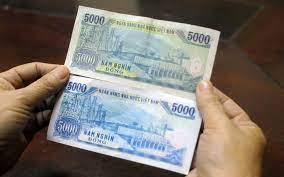

0.0 % 200
0.0 % 500
0.0 % 1000
0.0 % 2000
96.252 % 5000
0.0 % 10000
3.748 % 20000
0.0 % 50000
0.0 % 100000
0.0 % 200000
0.0 % 500000
Đây là tờ 5000 VNĐ


In [285]:
img = cv.imread('/content/drive/MyDrive/Money/Test/5000.jpg', cv.IMREAD_COLOR)
cv2_imshow(img)
img = cv.resize(img,dsize=(128,128))
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
print('Đây là tờ ' + classes[np.argmax(predict)] + ' VNĐ')

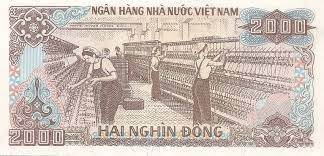

0.066 % 200
0.0 % 500
0.0 % 1000
99.934 % 2000
0.0 % 5000
0.0 % 10000
0.0 % 20000
0.0 % 50000
0.0 % 100000
0.0 % 200000
0.0 % 500000
Đây là tờ 2000 VNĐ


In [304]:
img = cv.imread('/content/drive/MyDrive/Money/Test/2000.jpg', cv.IMREAD_COLOR)
cv2_imshow(img)
img = cv.resize(img,dsize=(128,128))
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
print('Đây là tờ ' + classes[np.argmax(predict)] + ' VNĐ')

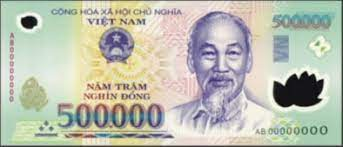

0.0 % 200
0.0 % 500
0.0 % 1000
0.0 % 2000
0.0 % 5000
0.0 % 10000
0.0 % 20000
0.0 % 50000
0.0 % 100000
0.0 % 200000
100.0 % 500000
Đây là tờ 500000 VNĐ


In [296]:
img = cv.imread('/content/drive/MyDrive/Money/Test/500000.jpg', cv.IMREAD_COLOR)
cv2_imshow(img)
img = cv.resize(img,dsize=(128,128))
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
print('Đây là tờ ' + classes[np.argmax(predict)] + ' VNĐ')